# Liste des modules

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip= True)

test_datagen = ImageDataGenerator(
    horizontal_flip=False)

In [3]:
path="/media/jhy/46AE-6494/DB/img/food/fruits-360/"

directory = path + 'Training-light'
Train = train_datagen.flow_from_directory(
    directory= directory,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

directory = path + 'Test-light'
Test = test_datagen.flow_from_directory(
    directory= directory,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
)

Found 982 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [4]:
 label_map = (Train.class_indices)

In [5]:
print(label_map)

{'Apple Red 1': 0, 'Banana': 1}


In [6]:
# Load the pretained model
pretrained_model = keras.applications.MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

9412608/9406464 [==============================] - 21s 2us/step


In [7]:
inputs = pretrained_model.input

x = keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = keras.layers.Dense(128, activation='relu')(x)

outputs = keras.layers.Dense(2, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

ise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 6, 6, 64)     256         block_6_project[0][0]            
__________________________________________________________________________________________________
block_7_expand (Conv2D)         (None, 6, 6, 384)    24576       block_6_project_BN[0][0]         
__________________________________________________________________________________________________
block_7_expand_BN (BatchNormali (None, 6, 6, 384)    1536        block_7_expand[0][0]             
__________________________________________________________________________________________________
block_7_expand_relu (ReLU)      (None, 6, 6, 384)    0           block_7_expand_BN[0][0]          
__________________________________________________________________________________________________
block_7_depthwise (DepthwiseCon (None, 6, 6, 384)    3456        block_7_expand_relu[0][0

In [9]:
history = model.fit(
    Train,
    validation_data=Test,
    epochs = 5)

Epoch 1/5
31/31 [==============================] - 20s 637ms/step - loss: 0.0232 - accuracy: 0.9939 - val_loss: 6.4662e-08 - val_accuracy: 1.0000
Epoch 2/5
31/31 [==============================] - 21s 665ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
31/31 [==============================] - 20s 657ms/step - loss: 7.9077e-04 - accuracy: 1.0000 - val_loss: 2.4755 - val_accuracy: 0.9091
Epoch 4/5
31/31 [==============================] - 21s 671ms/step - loss: 0.0606 - accuracy: 0.9919 - val_loss: 1.7159e-07 - val_accuracy: 1.0000
Epoch 5/5
31/31 [==============================] - 21s 664ms/step - loss: 0.0040 - accuracy: 0.9980 - val_loss: 1.4058 - val_accuracy: 0.8485


## TEST

In [14]:
def prediction (img_path):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    
    img = image.load_img(img_path, target_size=(96,96), color_mode = "rgb")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    result = model.predict(x)
    y_classes = result.argmax(axis=-1)
    
    return y_classes

In [15]:
from IPython.display import Image

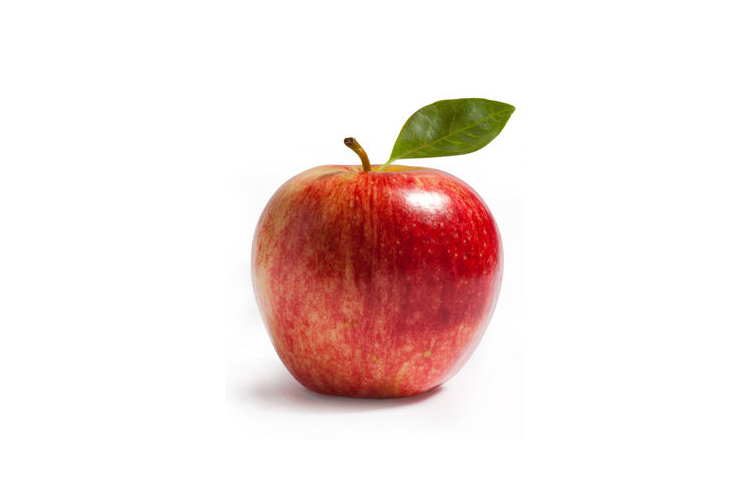

In [16]:
img_path="/media/jhy/46AE-6494/DB/img/food/Pomme/1.jpg"
Image(filename=img_path)


In [17]:
prediction(img_path) 

array([0])

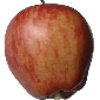

In [18]:
img_path="/media/jhy/46AE-6494/DB/img/food/fruits-360/Test-light/Apple Red 1/6_100.jpg"
Image(filename=img_path)

In [19]:

prediction(img_path) 

array([0])

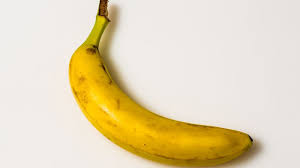

In [20]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/01.jpeg"
Image(filename=img_path)

In [21]:

prediction(img_path) 

array([1])

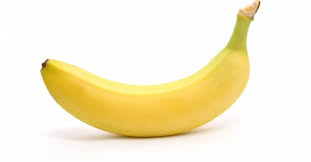

In [22]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/02.jpeg"
Image(filename=img_path)

In [23]:

prediction(img_path) 

array([1])

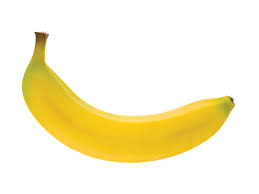

In [24]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/03.jpeg"
Image(filename=img_path)


In [25]:
prediction(img_path) 

array([1])

In [26]:
model.save('models/modele-prototype')

INFO:tensorflow:Assets written to: models/modele-prototype/assets
